In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [12]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(images, _), (_, _) = mnist.load_data()

# Normalize pixel values
images = images / 255.0

# Reshape images to (28, 28, 1)
images = images.reshape(images.shape + (1,))
print(images.shape)

# Define a simple neural network architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(28 * 28 * 1, activation=None),
    layers.Reshape((28, 28, 1))  # Output layer with the same shape as input
])

model.compile(optimizer='adam', loss='mse')
model.fit(images, images, epochs=10, batch_size=32, validation_split=0.2)


(60000, 28, 28, 1)
Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.0603 - val_loss: 0.0565
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0548 - val_loss: 0.0533
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0524 - val_loss: 0.0503
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0473 - val_loss: 0.0457
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0451 - val_loss: 0.0445
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0440 - val_loss: 0.0434
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0434 - val_loss: 0.0428
Epoch 8/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0425 - val_loss: 0.0421
Epoch 9/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0418 - val_loss: 0.0414
Epoch 10/10
1500/1500 [==============================] - 8s 5m

In [13]:
# Get the output of the penultimate layer (adjust the layer index as needed)
last_layer_output = model.layers[-2].output

# Create a new model that outputs the penultimate layer's output
feature_extraction_model = models.Model(inputs=model.input, outputs=last_layer_output)

In [23]:
# Assuming X_train and X_test are flattened, reshape them to (28, 28, 1)
X_train_reshaped = images.reshape(-1, 28, 28, 1)
X_test_reshaped = images.reshape(-1, 28, 28, 1)

# Apply the model to obtain the higher-dimensional representation
higher_dimensional_representation_train = feature_extraction_model.predict(X_train_reshaped)
higher_dimensional_representation_test = feature_extraction_model.predict(X_test_reshaped)

# Standardize the data before applying SVD
scaler = StandardScaler()
higher_dimensional_representation_train_std = scaler.fit_transform(higher_dimensional_representation_train)
higher_dimensional_representation_test_std = scaler.transform(higher_dimensional_representation_test)

# Apply Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=300)  # Adjust the number of components as needed
svd.fit(higher_dimensional_representation_train_std)

1875/1875 [==============================] - 5s 2ms/step


TruncatedSVD(n_components=300)

In [27]:
flattened = images.reshape(images.shape[0], -1)
print(flattened.shape)

svd_original = TruncatedSVD(n_components=(28*28) - 1)
X_svd = svd_original.fit_transform(flattened)

(60000, 784)


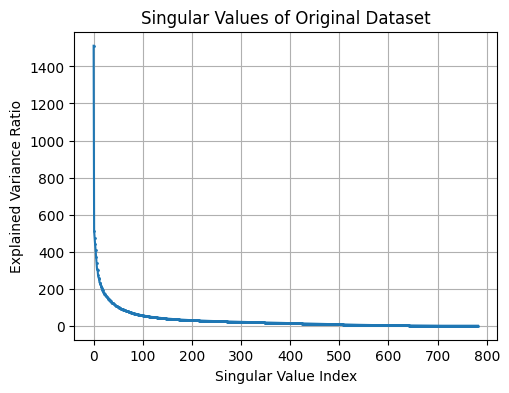

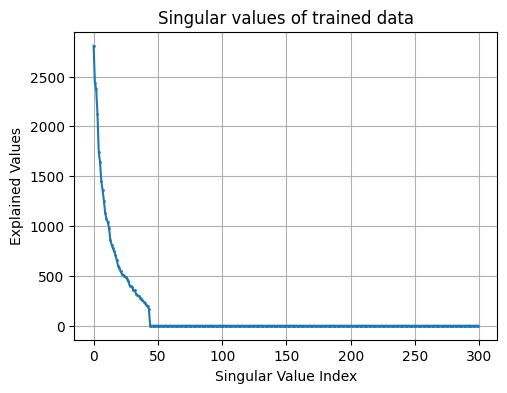

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(svd_original.singular_values_, marker='o', markersize=1)
plt.title("Singular Values of Original Dataset")
plt.xlabel("Singular Value Index")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)

plt.figure(figsize=(12, 4))
plt.subplot(122)
plt.plot(svd.singular_values_, marker='o', markersize=1)
plt.title("Singular values of trained data")
plt.xlabel("Singular Value Index")
plt.ylabel("Explained Values")
plt.grid(True)

plt.subplots_adjust()
